#**1. Loading and Inspecting the Dataset**


You start by loading the dataset and inspecting its structure to understand what kind of data you're working with. This includes checking the data types to ensure the correct features are used for clustering.

In [153]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Display the rows of the dataset
print(data)


     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


#**2. Selecting Numeric Features and Checking for Missing Values**

You select numeric features for clustering and check for any missing values in the dataset. This ensures that the data used for clustering is clean.

In [154]:
print(data.dtypes)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [155]:
# Display data types of numeric features
numeric_features = data.select_dtypes(include=['int64', 'float64'])
print(numeric_features.dtypes)

CustomerID                int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object


In [156]:
# Check for missing values
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


#**3. Feature Selection and Normalization**

You select relevant features for clustering and normalize the data to standardize the feature scales, which is important for distance-based algorithms like K-Means.

In [157]:
# Select relevant features for clustering
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)

print(data_scaled[:5])


[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


#**4. K-Means Clustering and Elbow Method**

You use the Elbow Method to determine the optimal number of clusters by plotting the WCSS (Within-Cluster Sum of Squares) for different numbers of clusters.


##**Understanding the Elbow Method for K-Means Clustering**

The Elbow Method is used to determine the optimal number of clusters
𝑘
k in a dataset. It helps to identify a suitable value of
𝑘
k by plotting the Within-Cluster Sum of Squares (WCSS) against different values of
𝑘
k and finding the "elbow" point where the rate of decrease sharply slows down.

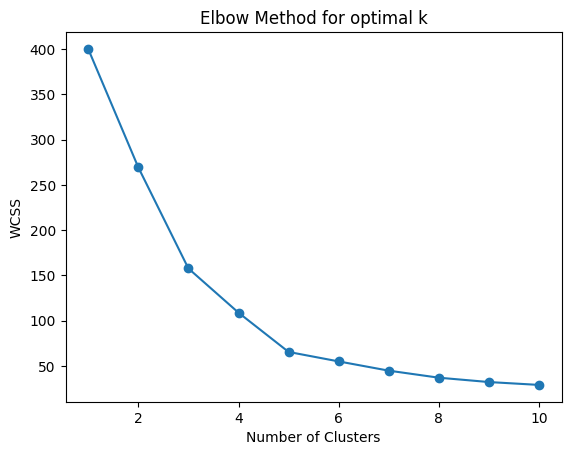

In [162]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # stores the Within-Cluster Sum of Squares for each K value.
k = range(1, 11)

# Test K values from 1 to 10
for i in k:
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)

    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(k, wcss, marker='o')
plt.title('Elbow Method for optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [146]:
pip install kneed

In [159]:
# Find the elbow point using KneeLocator from the kneed package
from kneed import KneeLocator

kneedle = KneeLocator(k, wcss, curve="convex", direction="decreasing")
optimal_k = kneedle.elbow
print(f'The optimal number of clusters is: {optimal_k}')

The optimal number of clusters is: 5


#**5. Applying K-Means with the Chosen Number of Clusters**

You apply K-Means clustering with the chosen number of clusters and add the cluster labels to the original dataset.

In [160]:
# Apply K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original dataset
data['Cluster'] = clusters
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        3  
1        4  
2        3  
3        4  
4        3  


#**6. Dimensionality Reduction and Visualization**

You use PCA to reduce the data to 2 dimensions for visualization and plot the clusters to understand their distribution.

In [169]:
from sklearn.decomposition import PCA

# Reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)
print(pca_data[0:10])

[[-1.5371092  -0.92220705]
 [-0.38416767 -2.07514858]
 [-2.41600197  0.01066545]
 [-0.46698176 -1.93835476]
 [-1.45567848 -0.89567831]
 [-0.46744289 -1.88391391]
 [-2.36202224  0.06464517]
 [ 0.05366478 -2.35104185]
 [-2.41738535  0.173988  ]
 [-0.52326712 -1.72013023]]


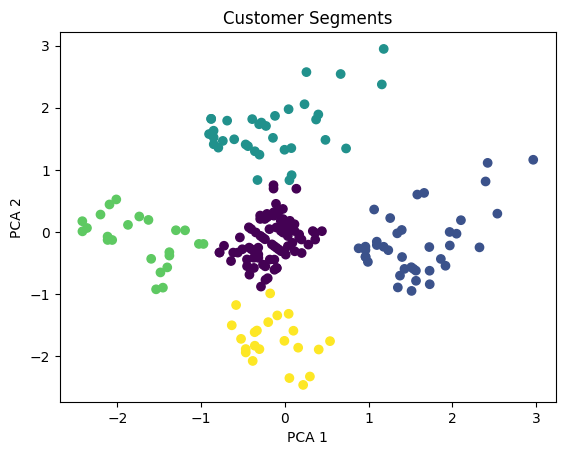

In [170]:
# Plot the clusters
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [171]:
print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Cluster  
0          3  
1          4  
2          3  
3          4  
4          3

#**7. Calculating Mean Values for Each Cluster**

You calculate the mean values of features for each cluster to understand the characteristics of each cluster.

In [172]:
data_for_mean = data.drop(columns=['Gender', 'CustomerID'])

In [173]:
cluster_means = data_for_mean.groupby('Cluster').mean()
print(cluster_means)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        41.114286           88.200000               17.114286
3        45.217391           26.304348               20.913043
4        25.272727           25.727273               79.363636
